<a href="https://colab.research.google.com/github/VAEs-Tutorial/BMI/blob/master/molecule_structure_design_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Bibyutatsu/FastJTNNpy3.git

Cloning into 'FastJTNNpy3'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 402 (delta 15), reused 42 (delta 6), pack-reused 341
Receiving objects: 100% (402/402), 520.25 MiB | 36.67 MiB/s, done.
Resolving deltas: 100% (45/45), done.
Checking out files: 100% (308/308), done.


In [4]:
!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
!chmod +x Miniconda3-latest-Linux-x86_64.sh
!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
!time conda install -q -y -c conda-forge rdkit

--2020-07-22 01:06:06--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c84f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2020-07-22 01:06:06--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88867207 (85M) [application/x-sh]
Saving to: ‘Miniconda3-latest-Linux-x86_64.sh’

Miniconda3-latest-L 100%[===================>]  84.75M   197MB/s    in 0.4s    

2020-07-22 01:06:07 (197 MB/s) - ‘Miniconda3-latest-Linux

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
sys.path.append('/usr/local/lib/python3.7/site-packages/')

In [7]:
import pandas as pd
import rdkit
from rdkit import DataStructs, Chem
from rdkit.Chem import MACCSkeys, Draw
import torch

In [8]:
inp = pd.read_csv('/content/FastJTNNpy3/data/train.txt', names=['SMILES'])

In [9]:
inp['INCHI'] = inp['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
inp = inp.drop_duplicates(subset=['INCHI'], keep='first')

In [10]:

inp

,SMILES,INCHI
0,CCCCCCC1=NN2C(=N)/C(=C\c3cc(C)n(-c4ccc(C)cc4C)...,IDZWCROXWWNXQL-ZJRBDENDSA-N
1,COCC[C@@H](C)C(=O)N(C)Cc1ccc(O)cc1,YDAGYFXVVBAINK-LLVKDONJSA-N
2,C=CCn1c(S[C@H](C)c2nc3sc(C)c(C)c3c(=O)[nH]2)nn...,JJINXOJEJRZOMB-LLVKDONJSA-N
3,C[NH+](C/C=C/c1ccco1)CCC(F)(F)F,JFUZCTSYPHRVEI-DUXPYHPUSA-O
4,COc1ccc(N2C(=O)C(=O)N(CN3CCC(c4nc5ccccc5s4)CC3...,AIRMUVLCDQWVNR-UHFFFAOYSA-N
...,...,...
9995,O=C(NCc1nc2ccc(F)cc2[nH]1)[C@@H]1C[C@H]1[N+](=...,XMQHITGAOYPEJP-GMSGAONNSA-N
9996,COc1ccc(-c2[nH]cc(CO)[nH+]2)cc1,WXDITMPXBOLDKA-UHFFFAOYSA-O
9997,Cn1ncc2c1CCC[C@H]2NC(=O)CN1CCCC1=O,ZLECFBYOEAHMMM-LLVKDONJSA-N
9998,NC1=C(Br)[C@H](C(F)(F)F)N=N1,HSEQWUKHBPDMSH-UWTATZPHSA-N


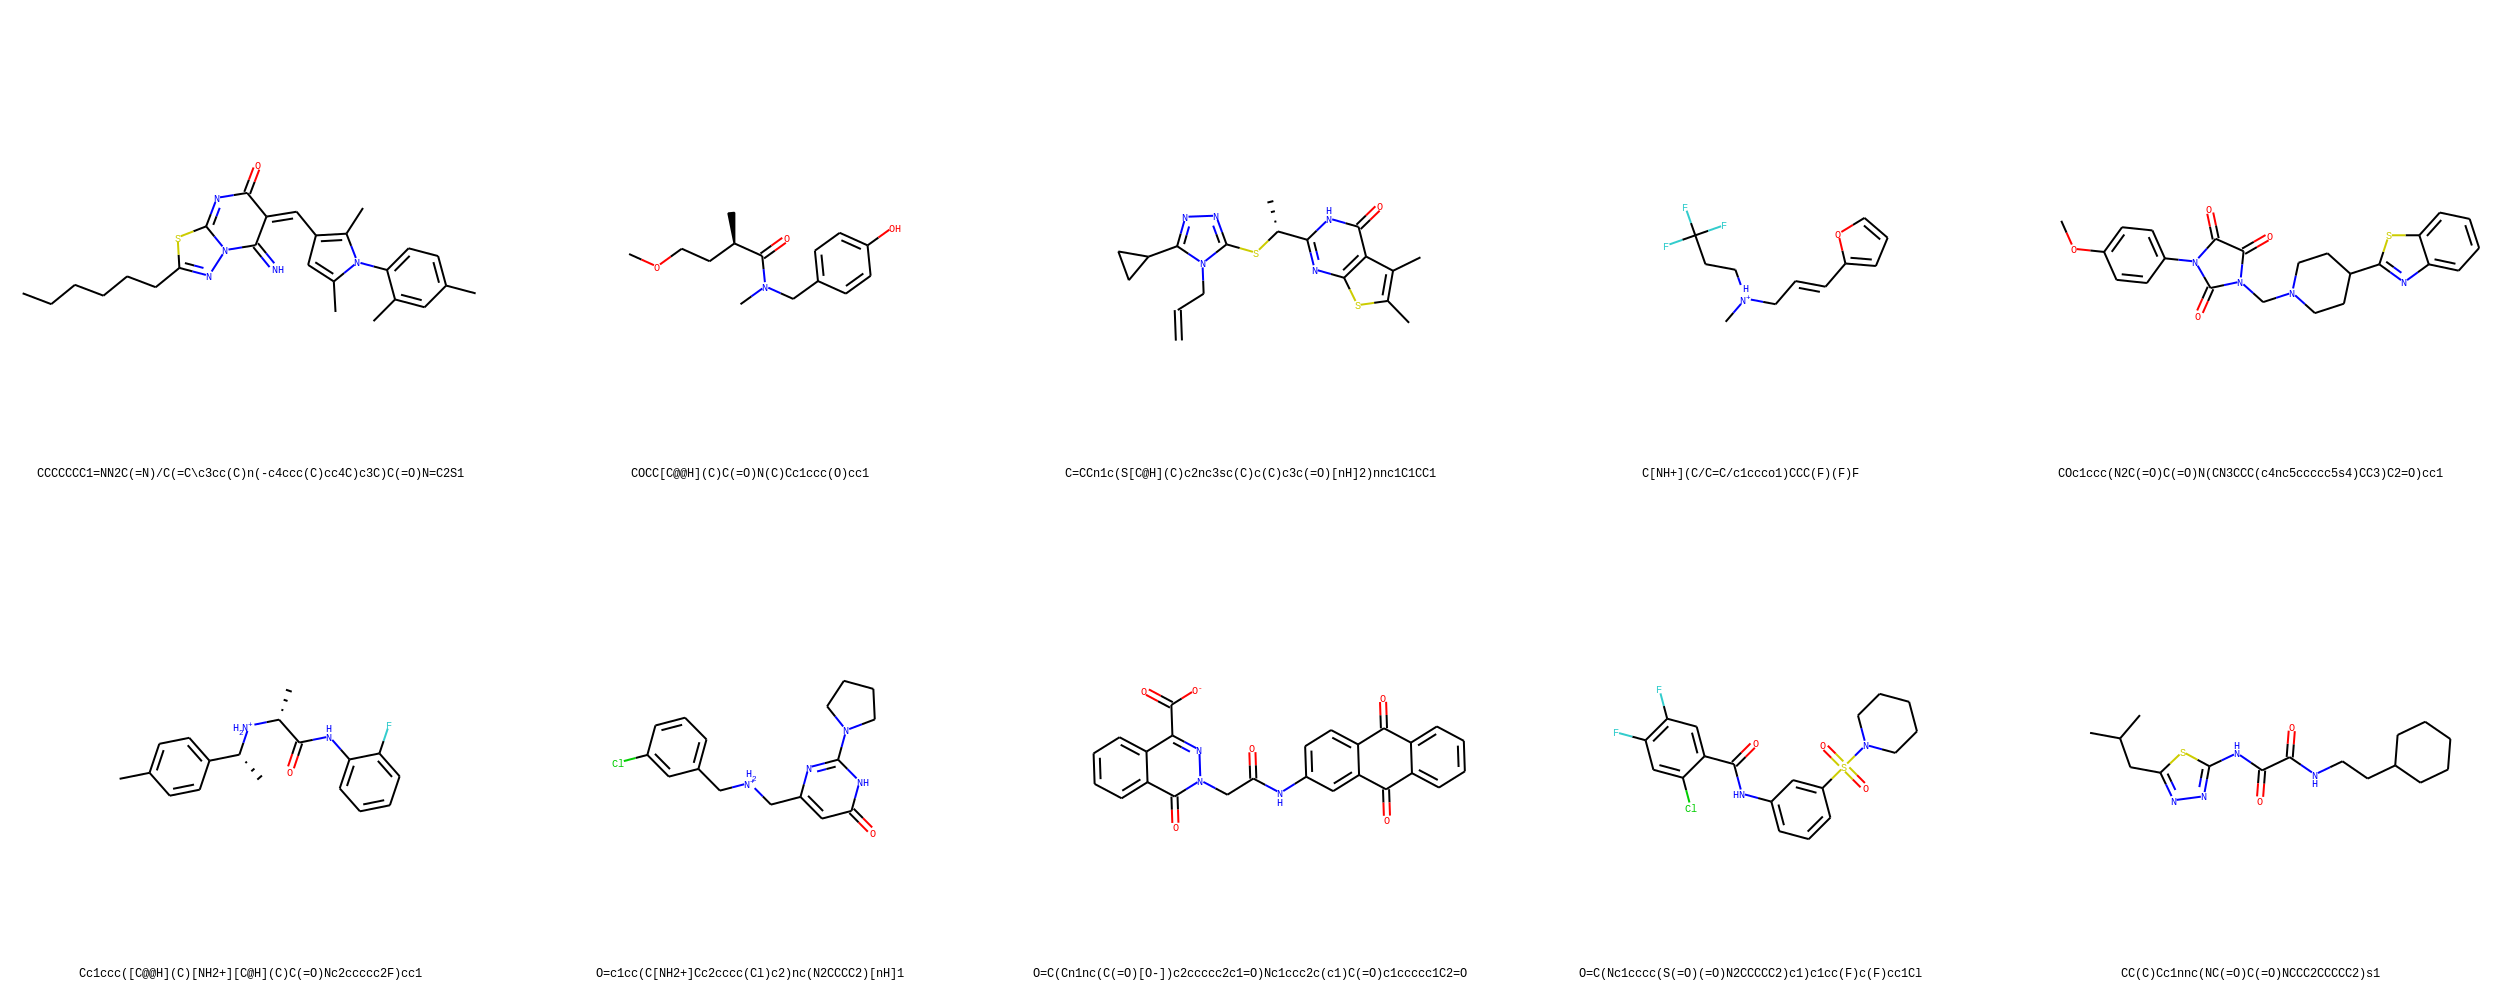

In [11]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(inp['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(inp['SMILES'])[:10])
img

In [15]:
from FastJTNNpy3.fast_jtnn.mol_tree import main_mol_tree


In [17]:

from FastJTNNpy3.fast_molvae.preprocess import main_preprocess

In [19]:
from FastJTNNpy3.fast_molvae.vae_train import main_vae_train

In [21]:
from FastJTNNpy3.fast_molvae.sample import main_sample

In [22]:
out = pd.read_csv('/content/FastJTNNpy3/fast_molvae/vae_model/sample.txt', names=['SMILES'])

In [23]:
out['INCHI'] = out['SMILES'].apply(lambda x: Chem.MolToInchiKey(Chem.MolFromSmiles(x)))
out = out.drop_duplicates(subset=['INCHI'], keep='first')

In [24]:
out

,SMILES,INCHI
0,CON1C=C(C(=O)Nc2cccc([N+](=O)[O-])c2)C=CC1,PYRRKQWYTZKZCF-UHFFFAOYSA-N
1,Cc1conc1NC(=O)c1cccc2c1OCCO2,LFBFGCUIVTXBEN-UHFFFAOYSA-N
2,CON1C=CC=CC1C(=O)Nc1ccc([N+](=O)[O-])cc1,OHNAVNNGIQDZNJ-UHFFFAOYSA-N
3,Cc1cc(NC(=O)c2ccc3c(c2)OCCO3)no1,PXIDZNHQAZVPHE-UHFFFAOYSA-N
4,CN1COC(=O)C1c1cccc2c1OCCO2,RKNATXIGCSRFSX-UHFFFAOYSA-N
...,...,...
94,O=C(CS(=O)(=O)NC1CCCC[NH2+]1)Nc1cccc2c1OC=CO2,CCYUAYXURYWPGJ-UHFFFAOYSA-O
95,CC1C(NCc2cccc3c2COC3)CCCS1(=O)=O,XCNHSCUIDMIXJH-UHFFFAOYSA-N
96,Cc1cnoc1NS(=O)(=O)Cc1ccccc1,SYDDZUDETRAKEM-UHFFFAOYSA-N
97,Cc1n[nH]cc1C[NH2+]c1ccc(C(N)=O)c2ccccc12,LJQSVMGNUQLDLR-UHFFFAOYSA-O


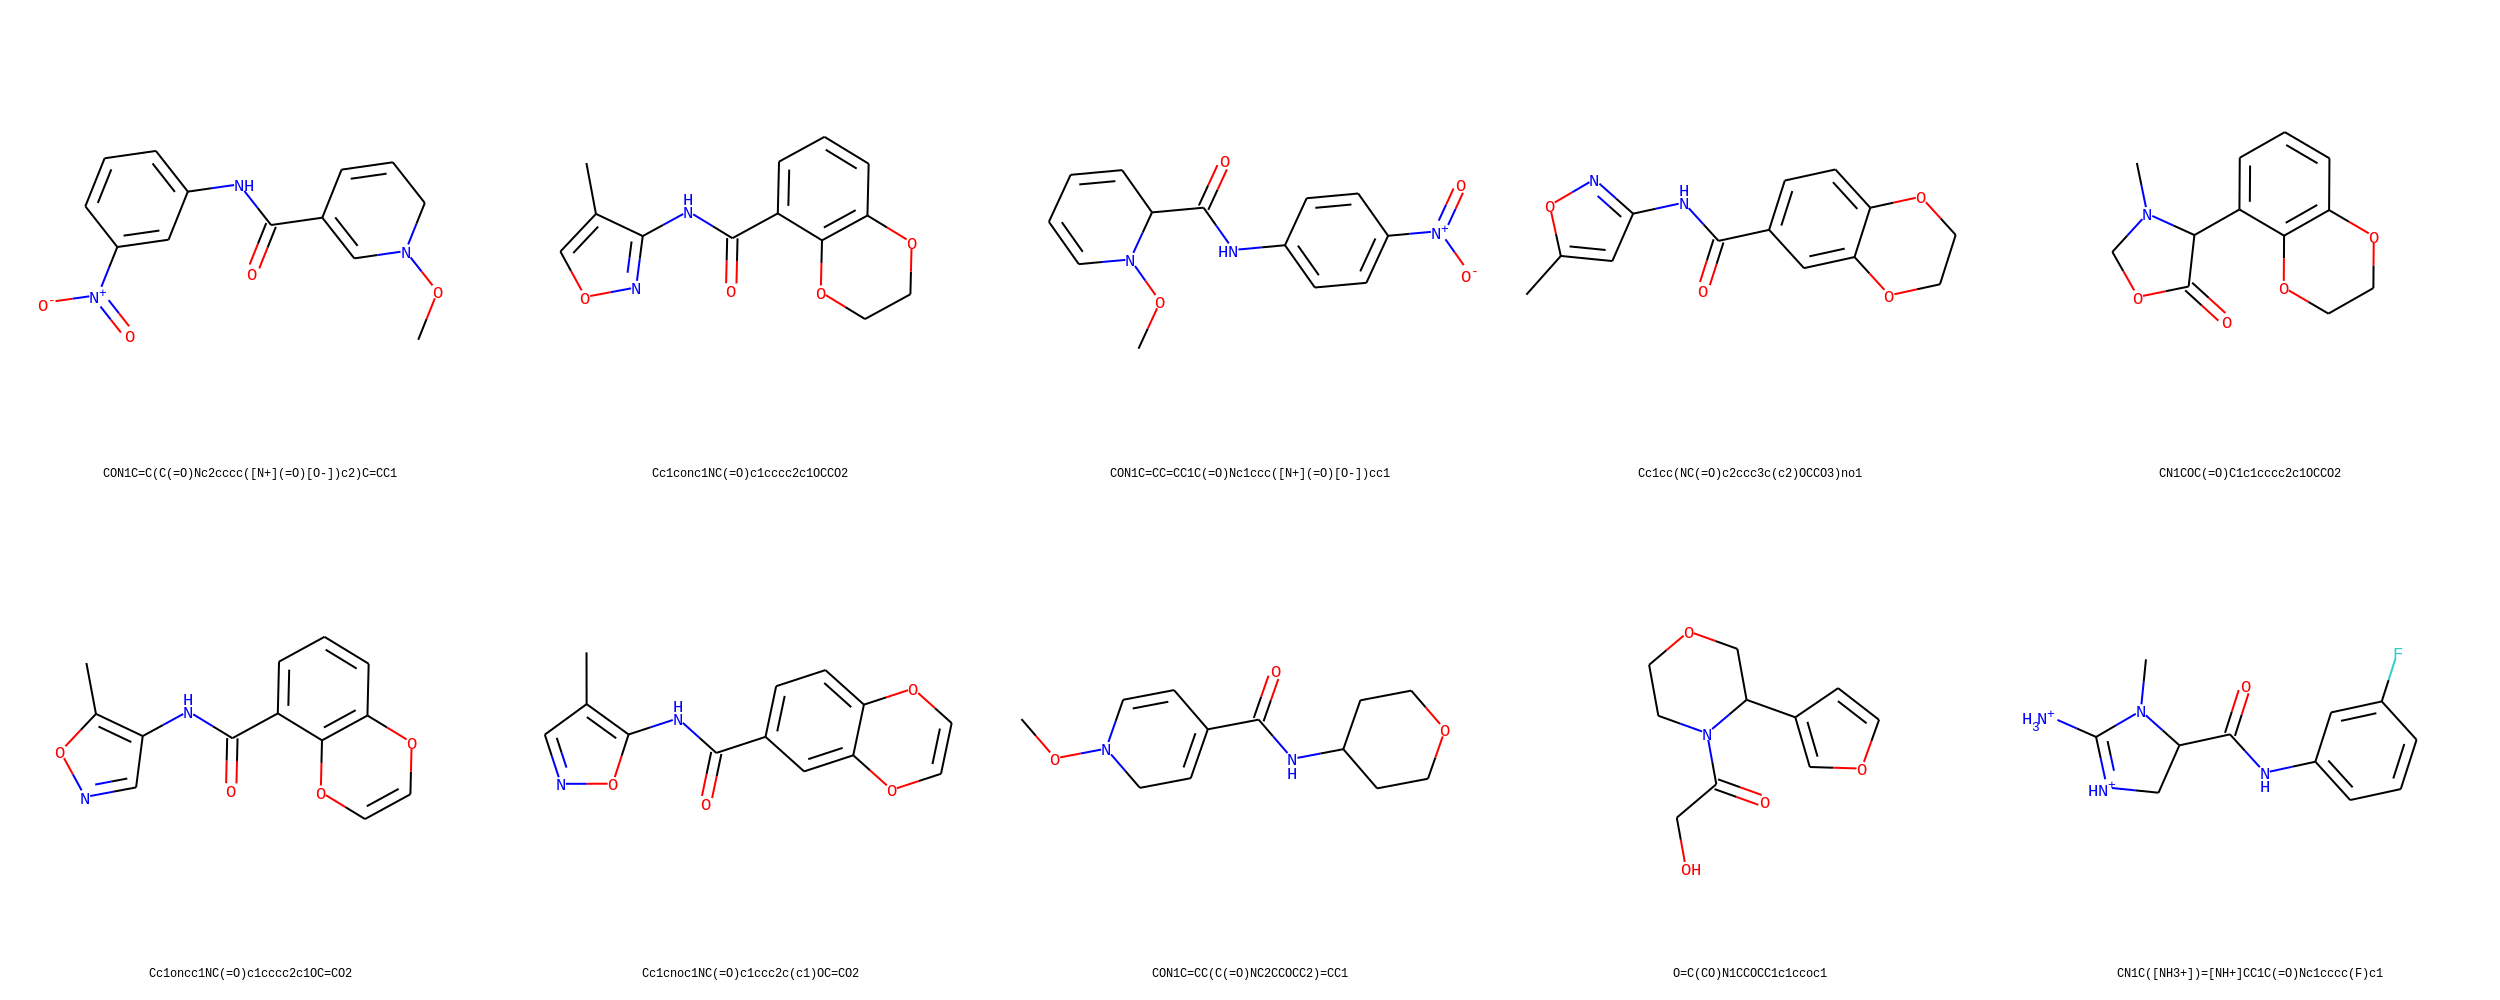

In [25]:
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in list(out['SMILES'])[:10]], molsPerRow=5,subImgSize=(500,500), legends=list(out['SMILES'])[:10])
img

In [27]:
from FastJTNNpy3.fast_molvae.sample import load_model
model = load_model('/content/FastJTNNpy3/data/vocab.txt', '/content/FastJTNNpy3/fast_molvae/vae_model/model.epoch-19')

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [28]:

z = torch.randn(1, 56//2).cuda() # a random tensor of size (1, latent_size / 2)

In [29]:
print('Random Smile: ', model.decode(z, z, False))

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Random Smile:  CON1C=C(C(=O)Nc2cccc([N+](=O)[O-])c2)C=CC1


In [30]:

import matplotlib.pyplot as plt

In [31]:

x = [i for _ in range(7) for i in range(-3, 4)]
y = [i for i in range(-3, 4) for _ in range(7)]
label_float = [(z[0][0].item()*(1 + xs*2), z[0][1].item()*(1 + ys*2)) for xs, ys in zip(reversed(x), reversed(y))]
# label = ['%.3f'%(xs)+','+ '%.3f'%(ys) for xs, ys in label_float]#zip(reversed(x), reversed(y))]
z_labels = [z.detach().clone() for _ in range(len(x))]

# Minor changes in the Tensor z to sample new molecules
for i, (xs, ys) in enumerate(label_float):
    z_labels[i][0][0] = xs
    z_labels[i][0][1] = ys

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


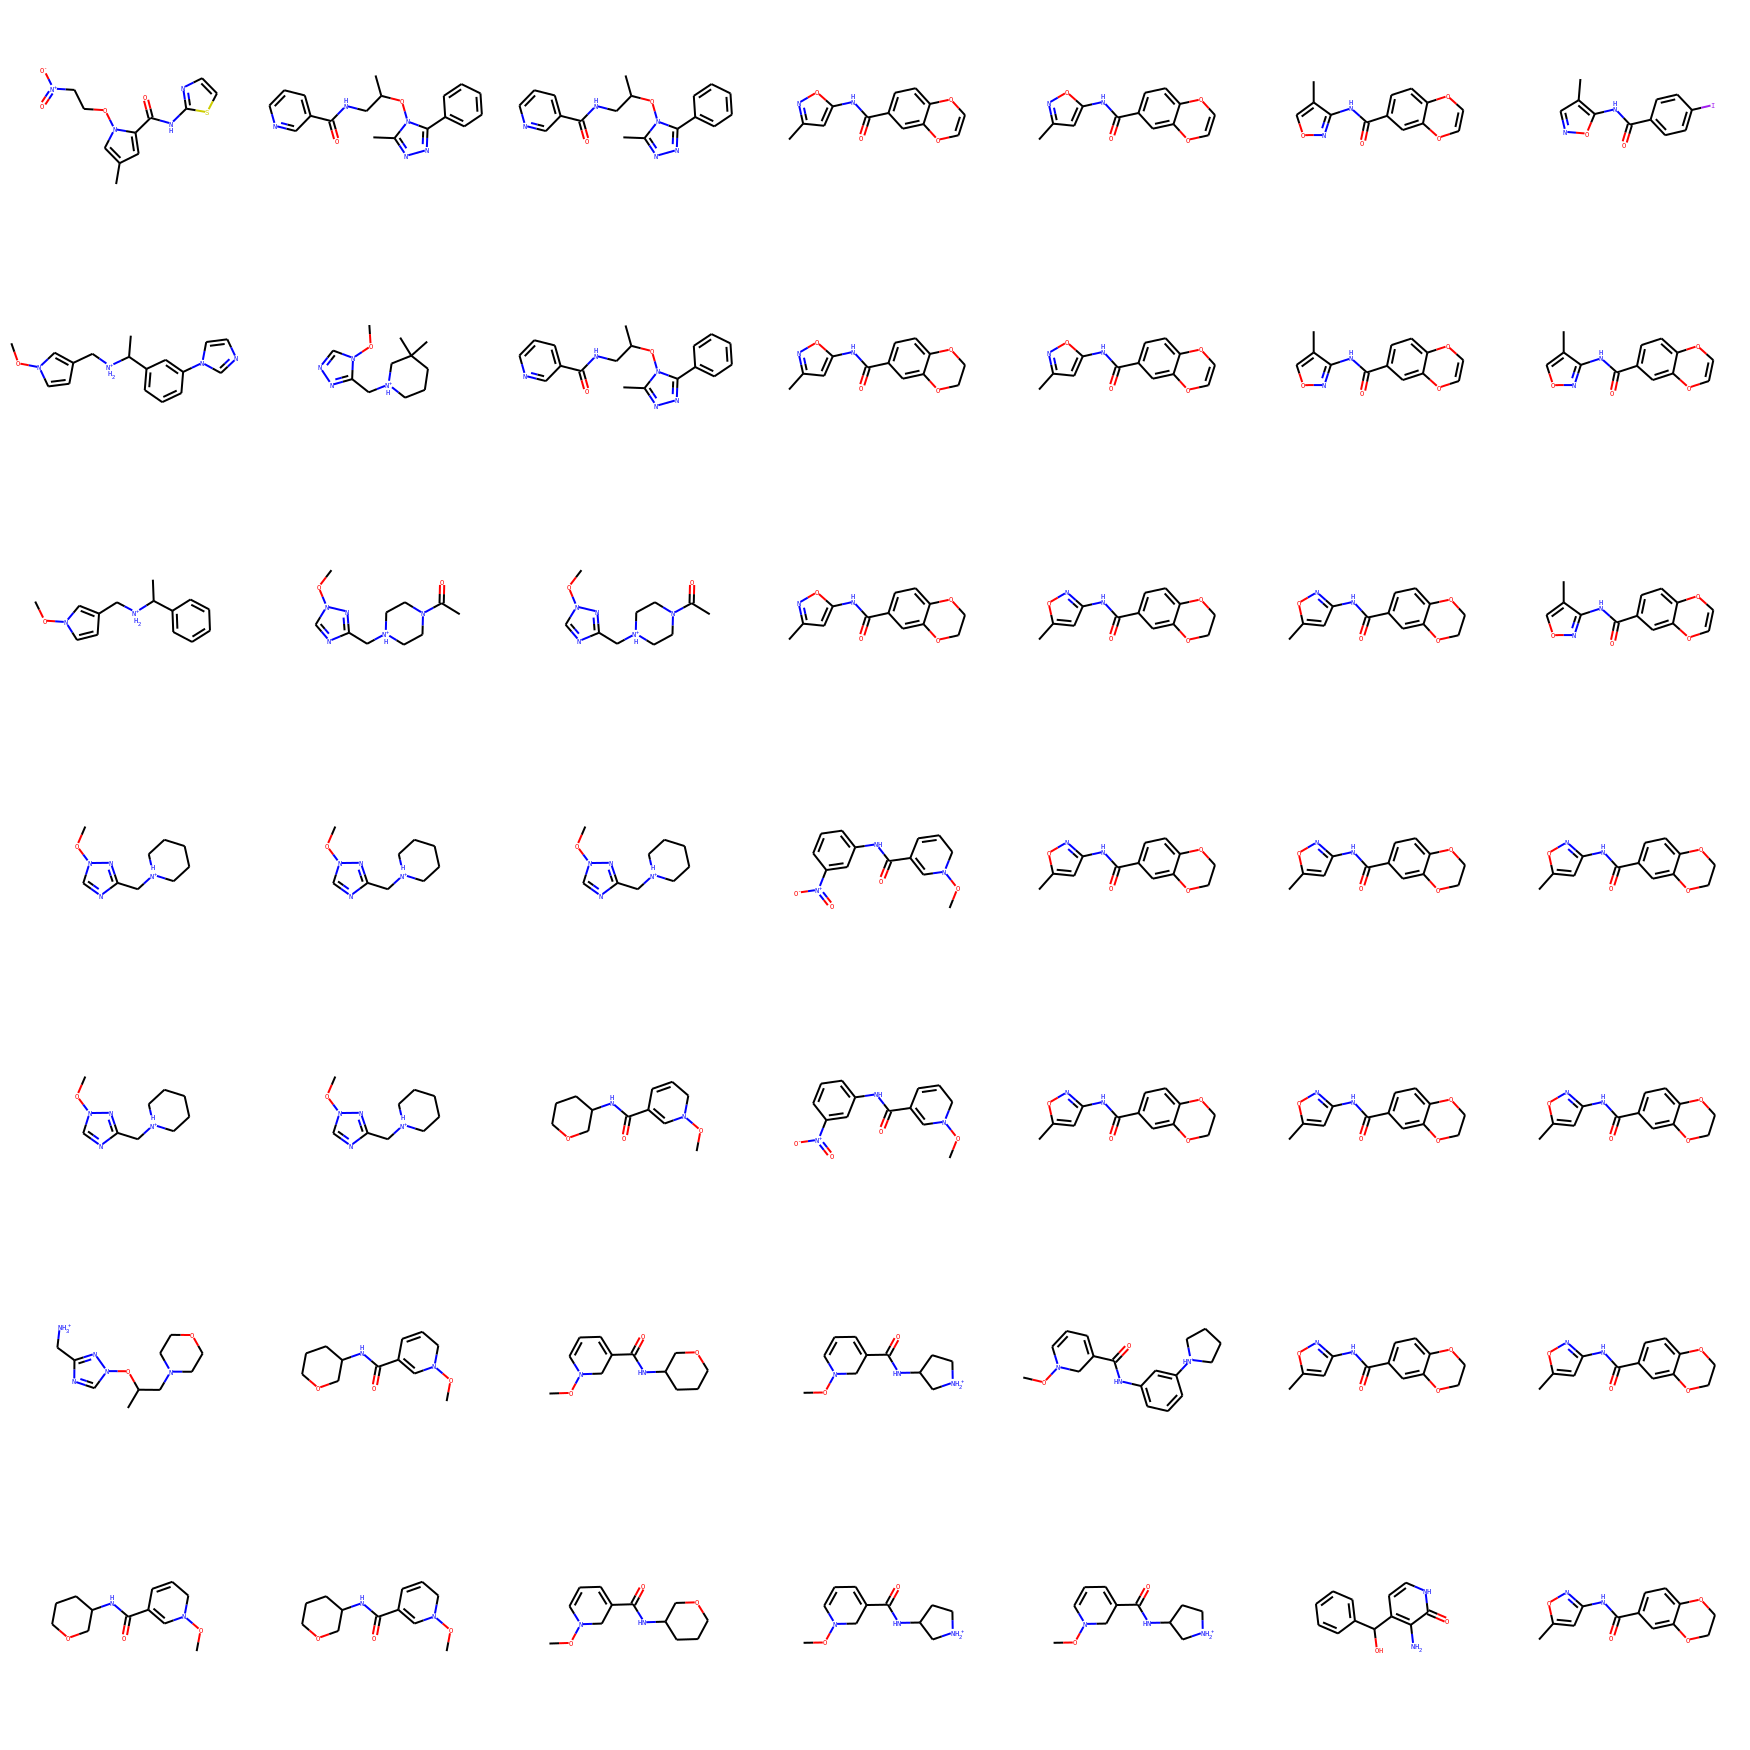

In [32]:
smiles = []
for zs in z_labels:
    smiles.append(model.decode(zs, zs, False))
img = Draw.MolsToGridImage([Chem.MolFromSmiles(mol) for mol in smiles], molsPerRow=7,subImgSize=(250,250))
img